In [228]:
# Importing packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as fit


# Part 1

In [229]:


gltinitial = pd.read_csv('GlobalLandTemperaturesByState.csv')

display(gltinitial)

glt = pd.DataFrame(data=gltinitial, columns=['dt','AverageTemperature','State'])
display(glt)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


,dt,AverageTemperature,State
0,1855-05-01,25.544,Acre
1,1855-06-01,24.228,Acre
2,1855-07-01,24.371,Acre
3,1855-08-01,25.427,Acre
4,1855-09-01,25.675,Acre
...,...,...,...
645670,2013-05-01,21.634,Zhejiang
645671,2013-06-01,24.679,Zhejiang
645672,2013-07-01,29.272,Zhejiang
645673,2013-08-01,29.202,Zhejiang


In [230]:
num = len(glt.sort_values('dt'))


numyears = [str(i) for i in range(2000,2014)]

glt['dtslice']=glt['dt'].str[:4]
pd.to_numeric(glt['dtslice'])

newglt = glt[glt['dtslice'].isin(numyears)]
display(newglt)


,dt,AverageTemperature,State,dtslice
1736,2000-01-01,25.934,Acre,2000
1737,2000-02-01,26.102,Acre,2000
1738,2000-03-01,26.107,Acre,2000
1739,2000-04-01,25.952,Acre,2000
1740,2000-05-01,25.832,Acre,2000
...,...,...,...,...
645670,2013-05-01,21.634,Zhejiang,2013
645671,2013-06-01,24.679,Zhejiang,2013
645672,2013-07-01,29.272,Zhejiang,2013
645673,2013-08-01,29.202,Zhejiang,2013


In [231]:
statenames = ['Wyoming','Nebraska','South Dakota']

filtered_glt = newglt[newglt['State'].isin(statenames)]
display(filtered_glt)

finalglt = pd.DataFrame(data=filtered_glt, columns=['dt','AverageTemperature','State'])
display(finalglt)


,dt,AverageTemperature,State,dtslice
350761,2000-01-01,-2.024,Nebraska,2000
350762,2000-02-01,1.719,Nebraska,2000
350763,2000-03-01,5.687,Nebraska,2000
350764,2000-04-01,9.417,Nebraska,2000
350765,2000-05-01,16.827,Nebraska,2000
...,...,...,...,...
626435,2013-05-01,10.607,Wyoming,2013
626436,2013-06-01,16.267,Wyoming,2013
626437,2013-07-01,20.222,Wyoming,2013
626438,2013-08-01,19.621,Wyoming,2013


,dt,AverageTemperature,State
350761,2000-01-01,-2.024,Nebraska
350762,2000-02-01,1.719,Nebraska
350763,2000-03-01,5.687,Nebraska
350764,2000-04-01,9.417,Nebraska
350765,2000-05-01,16.827,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [232]:
avgtemp = finalglt.groupby(['dt']).mean(['AverageTemperature'])
datelist = list(avgtemp.index.values)
print([i.split('-') for i in datelist])
splitstringlist = [i.split('-') for i in datelist]
floatvalueslist = []
for i in splitstringlist:
    floatvalueslist.append(float(i[0]) + (float(i[1])-1)/12)
print(floatvalueslist)
display(avgtemp)
avgtempvalues = list(avgtemp['AverageTemperature'])


[['2000', '01', '01'], ['2000', '02', '01'], ['2000', '03', '01'], ['2000', '04', '01'], ['2000', '05', '01'], ['2000', '06', '01'], ['2000', '07', '01'], ['2000', '08', '01'], ['2000', '09', '01'], ['2000', '10', '01'], ['2000', '11', '01'], ['2000', '12', '01'], ['2001', '01', '01'], ['2001', '02', '01'], ['2001', '03', '01'], ['2001', '04', '01'], ['2001', '05', '01'], ['2001', '06', '01'], ['2001', '07', '01'], ['2001', '08', '01'], ['2001', '09', '01'], ['2001', '10', '01'], ['2001', '11', '01'], ['2001', '12', '01'], ['2002', '01', '01'], ['2002', '02', '01'], ['2002', '03', '01'], ['2002', '04', '01'], ['2002', '05', '01'], ['2002', '06', '01'], ['2002', '07', '01'], ['2002', '08', '01'], ['2002', '09', '01'], ['2002', '10', '01'], ['2002', '11', '01'], ['2002', '12', '01'], ['2003', '01', '01'], ['2003', '02', '01'], ['2003', '03', '01'], ['2003', '04', '01'], ['2003', '05', '01'], ['2003', '06', '01'], ['2003', '07', '01'], ['2003', '08', '01'], ['2003', '09', '01'], ['2003', 

,AverageTemperature
dt,
2000-01-01,-4.072000
2000-02-01,-0.205000
2000-03-01,3.642667
2000-04-01,7.609667
2000-05-01,14.255000
...,...
2013-05-01,13.196000
2013-06-01,18.783667
2013-07-01,22.110333


Text(0, 0.5, 'Average Temperature (in degrees Celsius)')

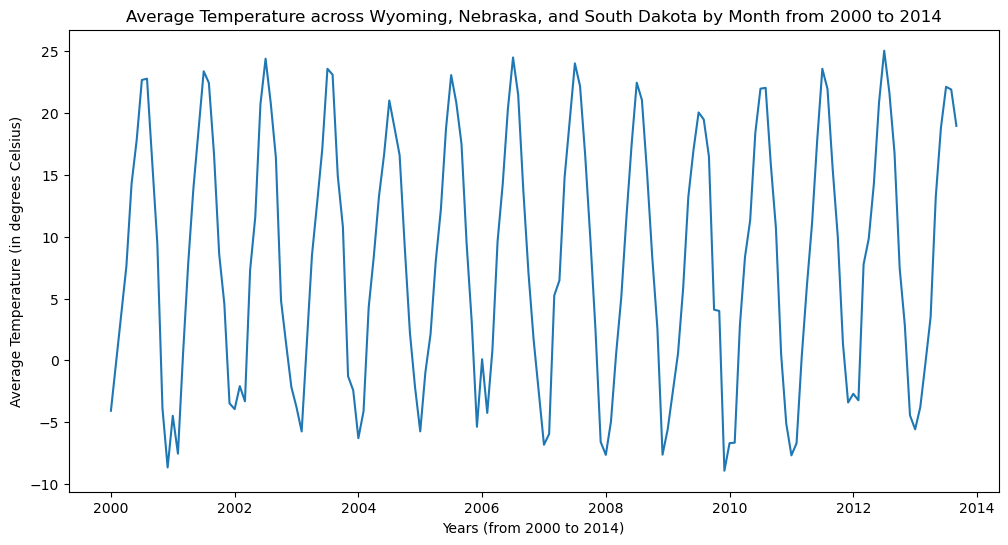

In [233]:
plt.figure(figsize=(12, 6))

plt.plot(floatvalueslist, avgtempvalues)
plt.title('Average Temperature across Wyoming, Nebraska, and South Dakota by Month from 2000 to 2014')
plt.xlabel('Years (from 2000 to 2014)')
plt.ylabel('Average Temperature (in degrees Celsius)')

In [234]:
def model(x,A,omega, phi,B):
    return A*np.sin(omega * x + phi) + B

# One period seems to be about one year -> omega should be 2*pi

par0g = np.array([15,2*np.pi,np.pi / -2,7])

par, cov = fit.curve_fit(model, floatvalueslist, avgtempvalues, par0g)

print(par,cov)



[13.89959812  6.27937241  6.02190743  8.12294993] [[ 5.12322085e-02  4.45903176e-05 -8.94485245e-02 -3.65407913e-04]
 [ 4.45903176e-05  1.72941315e-05 -3.47064391e-02  1.22288241e-05]
 [-8.94485245e-02 -3.47064391e-02  6.96503064e+01 -2.45982120e-02]
 [-3.65407913e-04  1.22288241e-05 -2.45982120e-02  2.57621542e-02]]


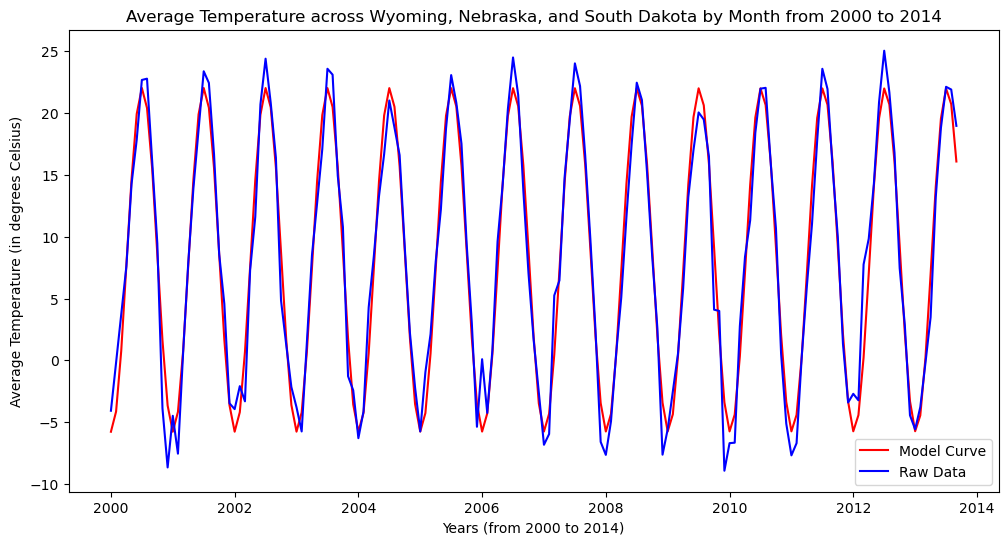

In [235]:
A, omega, phi, B = par

tmodel = np.array(floatvalueslist)
tempmodel = model(tmodel,A,omega,phi,B)

plt.figure(figsize=(12,6))
plt.plot(tmodel,tempmodel,'r',label='Model Curve')
plt.plot(floatvalueslist, avgtempvalues,'b',label='Raw Data')
plt.legend(loc='best')
plt.title('Average Temperature across Wyoming, Nebraska, and South Dakota by Month from 2000 to 2014')
plt.xlabel('Years (from 2000 to 2014)')
plt.ylabel('Average Temperature (in degrees Celsius)')
plt.show()

In [246]:
Aerror = np.sqrt(cov[0,0])
omegaerror = np.sqrt(cov[1,1])
phierror = np.sqrt(cov[2,2])
Berror = np.sqrt(cov[3,3])

print('A={0:6.6f}+/-{1:5.6f}'.format(A, Aerror))
print('Omega={0:6.6f}+/-{1:5.6f}'.format(omega, omegaerror))
print('Phi={0:6.6f}+/-{1:5.6f}'.format(phi, phierror))
print('B={0:6.6f}+/-{1:5.6f}'.format(B, Berror))

print('Final Model Equation:y = {0:6.6f} sin({1:6.6f}x + {2:6.6f}) + {3:6.6f} '.format(A,omega,phi,B))

A=13.899598+/-0.226345
Omega=6.279372+/-0.004159
Phi=6.021907+/-8.345676
B=8.122950+/-0.160506
Final Model Equation:y = 13.899598 sin(6.279372x + 6.021907) + 8.122950 


# Part 2

In [237]:
from astropy.io import ascii

data = ascii.read("global_CCl4_MM.dat")
print(data)

ccl4dfraw = data.to_pandas()
display(ccl4dfraw)


CCl4ottoyr CCl4ottomon CCl4ottoNHm ... CCl4ottoSHsd CCl4ottoGLm CCl4ottoGLsd
---------- ----------- ----------- ... ------------ ----------- ------------
      1996           1         nan ...          nan         nan          nan
      1996           2         nan ...          nan         nan          nan
      1996           3         nan ...          nan         nan          nan
      1996           4     105.318 ...        0.238     104.144        0.155
      1996           5     105.032 ...        0.287     103.893        0.174
      1996           6     105.327 ...        0.273     104.207        0.191
      1996           7      105.25 ...        0.233     104.136        0.147
      1996           8     104.855 ...        0.213     103.836        0.161
      1996           9     104.909 ...        0.441     103.861        0.254
      1996          10     104.735 ...        0.435     103.801         0.25
       ...         ...         ... ...          ...         ...          ...

,CCl4ottoyr,CCl4ottomon,CCl4ottoNHm,CCl4ottoNHsd,CCl4ottoSHm,CCl4ottoSHsd,CCl4ottoGLm,CCl4ottoGLsd
0,1996,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1996,2,NaN,NaN,NaN,NaN,NaN,NaN
2,1996,3,NaN,NaN,NaN,NaN,NaN,NaN
3,1996,4,105.318,0.197,102.969,0.238,104.144,0.155
4,1996,5,105.032,0.193,102.754,0.287,103.893,0.174
...,...,...,...,...,...,...,...,...
283,2019,8,NaN,NaN,NaN,NaN,NaN,NaN
284,2019,9,NaN,NaN,NaN,NaN,NaN,NaN
285,2019,10,NaN,NaN,NaN,NaN,NaN,NaN
286,2019,11,NaN,NaN,NaN,NaN,NaN,NaN


,CCl4ottoyr,CCl4ottomon,CCl4ottoGLm,CCl4ottoGLsd
3,1996,4,104.144,0.155
4,1996,5,103.893,0.174
5,1996,6,104.207,0.191
6,1996,7,104.136,0.147
7,1996,8,103.836,0.161
...,...,...,...,...
278,2019,3,79.008,0.199
279,2019,4,78.623,0.149
280,2019,5,78.862,0.226
281,2019,6,78.598,0.165


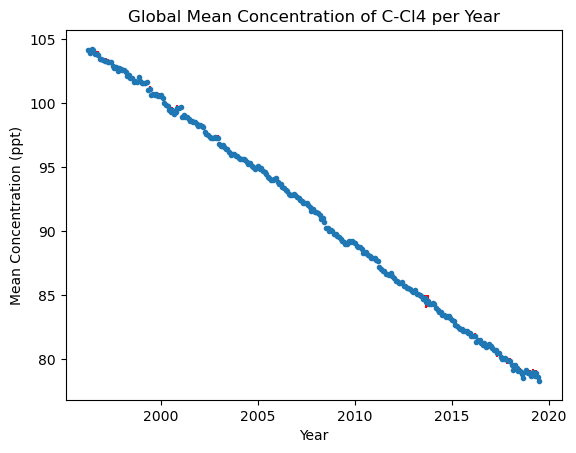

In [238]:
# Month, Northern Hemispheric mean concentration, Northern Hemispheric standard deviation, Southern Hemispheric mean concentration,

# Southern Hemispheric standard deviation, Global mean concentration, Global standard deviation

ccl4df = pd.DataFrame(data=ccl4dfraw,columns=['CCl4ottoyr', 'CCl4ottomon', 'CCl4ottoGLm','CCl4ottoGLsd'])

ccl4df = ccl4df.dropna()
display(ccl4df)

xyrs1 = list(ccl4df['CCl4ottoyr'])
xmons1 = list(ccl4df['CCl4ottomon'])
xvalues1 = []
for i in range(len(xyrs1)):
    xvalues1.append(float(xyrs1[i]) + (float(xmons1[i])-1)/12)


xvalues2 = np.array(xvalues1)
yvalues1 = list(ccl4df['CCl4ottoGLm'])
yvalues2 = np.array(yvalues1)
yerrvalue = list(ccl4df['CCl4ottoGLsd'])
yerrvalues = np.array(yerrvalue)
plt.figure()
plt.errorbar(x=xvalues2,y=yvalues2,yerr=yerrvalues,fmt='.',ecolor='r')
plt.title('Global Mean Concentration of C-Cl4 per Year')
plt.xlabel('Year')
plt.ylabel('Mean Concentration (ppt)')

plt.show()

# As you can see, the error is barely noticeable.

In [239]:
def model2(x,m,b):
    return m*x + b
parguess = np.array([-1,2000])

par2,cov2 = fit.curve_fit(model2, xvalues2, yvalues2, parguess, yerrvalues, absolute_sigma=True)
print(par2, cov2)

[-1.1544097e+00  2.4092192e+03] [[ 1.64039490e-06 -3.29390655e-03]
 [-3.29390655e-03  6.61420043e+00]]


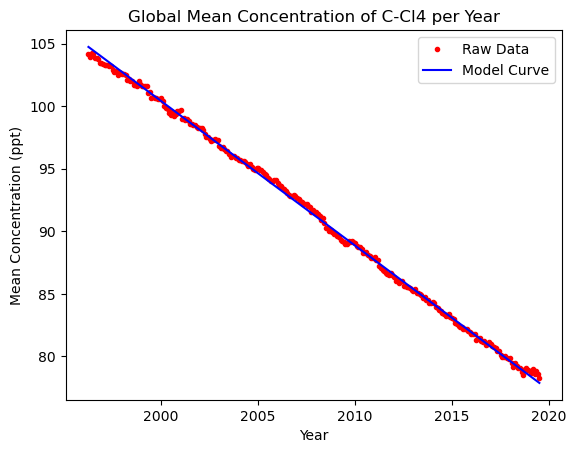

In [240]:
xmodel2 = np.array(xvalues2)
m2, b2 = par2
ymodel2 = model2(xmodel2,m2,b2)

plt.figure()
plt.plot(xvalues2,yvalues2,'r.',label='Raw Data')
plt.plot(xmodel2,ymodel2,'b',label='Model Curve')

plt.legend(loc='best')


plt.title('Global Mean Concentration of C-Cl4 per Year')
plt.xlabel('Year')
plt.ylabel('Mean Concentration (ppt)')

plt.show()

Visually we can see that the model seems appropriate for the data.

In [241]:
chi_squared = np.sum(((ymodel2-yvalues2)/yerrvalues)**2) 
print('chi^2 = {0:5.2f}'.format(chi_squared))

reduced_chi_squared = (chi_squared)/(len(xvalues2)-len(par))
print ('Reduced chi^2={0:5.2f}'.format(reduced_chi_squared))

chi^2 = 1233.44
Reduced chi^2= 4.47


In [247]:
print('m={0:6.6f}+/-{1:5.6f}'.format(m2, np.sqrt(cov2[0,0])))
print('b={0:6.6f}+/-{1:5.6f}'.format(b2, np.sqrt(cov2[1,1])))
print('Final Model Equation: y = {0:6.6f} x + {1:6.6f}'.format(m2,b2))


m=-1.154410+/-0.001281
b=2409.219197+/-2.571809
Final Model Equation: y = -1.154410 x + 2409.219197


A linear model does seem appropriate for this data - even though the reduced chi-squared is a bit high, visually we can see that a linear model fits the raw data reasonably well.